## Imports and data preparation

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np

FOLDER = "gdrive/My Drive/NLP/Fake_News"
dataset = pd.read_csv(FOLDER + "/train.csv")

# Display the dataset
print(dataset.columns)
news = dataset['text'].apply(str)
labels = np.array(dataset['label'])

print(news)

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')
0        House Dem Aide: We Didn’t Even See Comey’s Let...
1        Ever get the feeling your life circles the rou...
2        Why the Truth Might Get You Fired October 29, ...
3        Videos 15 Civilians Killed In Single US Airstr...
4        Print \nAn Iranian woman has been sentenced to...
                               ...                        
20795    Rapper T. I. unloaded on black celebrities who...
20796    When the Green Bay Packers lost to the Washing...
20797    The Macy’s of today grew from the union of sev...
20798    NATO, Russia To Hold Parallel Exercises In Bal...
20799      David Swanson is an author, activist, journa...
Name: text, Length: 20800, dtype: object


Preprocessing the reviews

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
nltk.download('punkt')

def preprocess_data(news):
  news = news.str.lower() # Lowercasing

  # Stopwords removal
  #nltk.download('stopwords')
  #stop_words = stopwords.words('english')

  #news = news.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)])) # Remove stopwords

  # Stemming
  #stemmer = PorterStemmer()

  #news = news.apply(lambda x: [stemmer.stem(y) for y in word_tokenize(x) if y.isalpha()])

  #print(news)

  #news = [' '.join(str(x) for x in article) for article in news]

  print(news)

  return news

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
news = preprocess_data(news)

0        house dem aide: we didn’t even see comey’s letter until jason chaffetz tweeted it by darrell lucus on october 30, 2016 subscribe jason chaffetz on the stump in american fork, utah ( image courtesy michael jolley, available under a creative commons-by license) \nwith apologies to keith olbermann, there is no doubt who the worst person in the world is this week–fbi director james comey. but according to a house democratic aide, it looks like we also know who the second-worst person is as well. it turns out that when comey sent his now-infamous letter announcing that the fbi was looking into emails that may be related to hillary clinton’s email server, the ranking democrats on the relevant committees didn’t hear about it from comey. they found out via a tweet from one of the republican committee chairmen. \nas we now know, comey notified the republican chairmen and democratic ranking members of the house intelligence, judiciary, and oversight committees that his agency was review

## Encoding

In [ ]:
from sklearn.model_selection import train_test_split

def split_dataset(text, labels):
  X_train, X_test, Y_train, Y_test = train_test_split(text, labels, test_size = 0.1)
  return X_train, Y_train, X_test, Y_test

In [ ]:
X, Y, X_test, Y_test = split_dataset(news, labels)

### Tfidf

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)

In [ ]:
X = vectorizer.fit_transform(X)
X_test = vectorizer.transform(X_test)

### Bag of words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()

In [ ]:
X = count_vect.fit_transform(X)
X_test = count_vect.transform(X_test)

## Models

### Classical approaches

#### SVM

In [ ]:
from sklearn import svm

classifier = svm.SVC(kernel = 'linear')
classifier.fit(X, Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Get accuracy on the test dataset

In [ ]:
from sklearn.metrics import accuracy_score

prediction = classifier.predict(X_test)
print(accuracy_score(Y_test, prediction))

0.9552884615384616


TFIDF:

With stop words removal -> 0.9783653846153846

Without stop words removal -> 0.9697115384615385

Stemming without stopwords removal -> 0.9591346153846154

Stemming with stopwords removal -> 0.9552884615384616

BOW:

With stopwords removal -> 0.9442307692307692

Without stopwords removal -> 0.9552884615384616

Stemming without stopwords removal -> 0.9298076923076923

Stemming with stopwords removal -> 0.9278846153846154

#### NB

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB().fit(X, Y)

In [ ]:
from sklearn.metrics import accuracy_score

prediction = classifier.predict(X_test)
print(accuracy_score(Y_test, prediction))

0.9149038461538461


TFIDF:

With stop words removal -> 0.9038461538461539

Without stop words removal -> 0.9115384615384615

Stemming without stopwords removal -> 0.8971153846153846

Stemming with stopwords removal -> 0.8836538461538461

BOW:

With stopwords removal -> 0.8990384615384616

Without stopwords removal -> 0.9149038461538461

Stemming without stopwords removal -> 0.8682692307692308

Stemming with stopwords removal -> 0.8778846153846154

#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X, Y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print(LR.score(X_test, Y_test))

0.9644230769230769


TFIDF:

With stop words removal -> 0.9634615384615385

Without stop words removal -> 0.9533653846153847

Stemming without stopwords removal -> 0.9418269230769231

Stemming with stopwords removal -> 0.948076923076923

BOW:

With stopwords removal -> 0.9615384615384616

Without stopwords removal -> 0.9644230769230769

Stemming without stopwords removal -> 0.9394230769230769

Stemming with stopwords removal -> 0.94375

### Deep learning

#### BERT

In [ ]:
X_train, Y_train, X_validation, Y_validation = split_dataset(X, Y)

In [ ]:
!pip install transformers

In [ ]:
import torch
# We will run the model on the GPU

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [ ]:
from transformers import BertTokenizer

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased', do_lower_case = False)

In [ ]:
train_input_ids = []
train_attention_masks = []

for news in X_train:

    encoded_dict = tokenizer.encode_plus(
                        news,
                        add_special_tokens = True, # Add [CLS] and [SEP]
                        max_length = 128,          # Pad and truncate to 128 characters
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Create attention masks so that BERT knows not to look at padding tokens
                        return_tensors = 'pt',     # Return pytorch tensors
                   )
    
    # Add the encoded value to the list
    train_input_ids.append(encoded_dict['input_ids'])
    
    # And the attention mask
    train_attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors
train_input_ids = torch.cat(train_input_ids, dim = 0)
train_attention_masks = torch.cat(train_attention_masks, dim = 0)
train_labels = torch.tensor(Y_train)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:2143: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
validation_input_ids = []
validation_attention_masks = []

for news in X_validation:

    encoded_dict = tokenizer.encode_plus(
                        news,
                        add_special_tokens = True, # Add [CLS] and [SEP]
                        max_length = 128,          # Pad and truncate to 128 characters
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Create attention masks so that BERT knows not to look at padding tokens
                        return_tensors = 'pt',     # Return pytorch tensors
                   )
    
    # Add the encoded value to the list
    validation_input_ids.append(encoded_dict['input_ids'])
    
    # And the attention mask
    validation_attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors
validation_input_ids = torch.cat(validation_input_ids, dim = 0)
validation_attention_masks = torch.cat(validation_attention_masks, dim = 0)
validation_labels = torch.tensor(Y_validation)

/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:2143: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
test_input_ids = []
test_attention_masks = []

for news in X_test:

    encoded_dict = tokenizer.encode_plus(
                        news,
                        add_special_tokens = True, # Add [CLS] and [SEP]
                        max_length = 128,          # Pad and truncate to 128 characters
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Create attention masks so that BERT knows not to look at padding tokens
                        return_tensors = 'pt',     # Return pytorch tensors
                   )
    
    # Add the encoded value to the list
    test_input_ids.append(encoded_dict['input_ids'])
    
    # And the attention mask
    test_attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors
test_input_ids = torch.cat(test_input_ids, dim = 0)
test_attention_masks = torch.cat(test_attention_masks, dim = 0)
test_labels = torch.tensor(Y_test)

/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:2143: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
from torch.utils.data import TensorDataset

# Create a tensor dataset out of the ids, attention masks and labels
train_dataset = TensorDataset(train_input_ids, train_attention_masks, train_labels)
validation_dataset = TensorDataset(validation_input_ids, validation_attention_masks, validation_labels)
test_dataset = TensorDataset(test_input_ids, test_attention_masks, test_labels)

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 32

# Create dataloaders for the training, validation and testing sets
train_dataloader = DataLoader(
            train_dataset,
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size
        )

validation_dataloader = DataLoader(
            validation_dataset,
            sampler = SequentialSampler(validation_dataset), # The order does not matter here, so we can just read them sequentially
            batch_size = batch_size
        )
test_dataloader = DataLoader(
            test_dataset,
            sampler = SequentialSampler(test_dataset), # The order does not matter here, so we can just read them sequentially
            batch_size = batch_size
        )

In [ ]:
from transformers import BertForSequenceClassification, AdamW
 
model = BertForSequenceClassification.from_pretrained(
    "bert-base-multilingual-cased",
    output_attentions = False, # Ww do not need the attention weights
    output_hidden_states = False, # We do not need to see the hidden states
)
 
# Run the model on the GPU
model.cuda()

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model ch

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elemen

In [ ]:
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # Learning rate
                  eps = 1e-8 # Epsilon
                )

In [ ]:
from transformers import get_linear_schedule_with_warmup
 
epochs = 5
 
# The number of training steps is [number of batches] x [number of epochs] 
total_steps = len(train_dataloader) * epochs
 
# Use a learning rate scheduler so that we can optimize the training
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0,
                                            num_training_steps = total_steps)

In [ ]:
# Calculate the accuracy of our prediction vs the ground truth
def get_accuracy(pred, labels):
    pred_flat = np.argmax(pred, axis = 1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import numpy as np
 
training_stats = []
 
for epoch in range(0, epochs):
    
    # Training
 
    print("")
    print('Epoch {:} / {:}'.format(epoch + 1, epochs))
    print('Training...')
 
    total_train_loss = 0
    model.train()
 
    for step, batch in enumerate(train_dataloader):
 
        # Progress update
        if step % 40 == 0 and not step == 0:
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}'.format(step, len(train_dataloader)))
 
        # Copy each tensor to the GPU
        batch_input_ids = batch[0].to(device)
        batch_input_mask = batch[1].to(device)
        batch_labels = batch[2].to(device)
 
        # Clear any previously calculated gradients
        model.zero_grad()        
 
        output = model(batch_input_ids, attention_mask = batch_input_mask, labels = batch_labels)
        loss = output.loss
        
        # We will calculate the total training loss at the end
        total_train_loss += loss.item()
 
        # Calculate the gradients with a backward pass
        loss.backward()
 
        # Clip the norm of the gradients to 1.0 so that we can prevent the "exploding gradients" problem
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
 
        # Update parameters and take a step using the computed gradient
        optimizer.step()
 
        # Update the learning rate
        scheduler.step()
 
    # Average training loss over all of the batches
    avg_train_loss = total_train_loss / len(train_dataloader)            
 
    print("")
    print("  Average training loss: {0:.4f}".format(avg_train_loss))
        
    # Validation
 
    print("")
    print("Validation...")
 
    model.eval()
 
    total_valid_accuracy = 0
    total_valid_loss = 0
 
    for batch in validation_dataloader:
        
        # Copy each tensor to the GPU
        batch_input_ids = batch[0].to(device)
        batch_input_mask = batch[1].to(device)
        batch_labels = batch[2].to(device)
        
        with torch.no_grad():
            output = model(batch_input_ids, attention_mask = batch_input_mask, labels = batch_labels)
            loss = output.loss
            logits = output.logits # Model values before activation
            
        # We will calculate the total validation loss at the end
        total_valid_loss += loss.item()
 
        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        labels = batch_labels.to('cpu').numpy()
 
        total_valid_accuracy += get_accuracy(logits, labels)
        
 
    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_valid_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.4f}".format(avg_val_accuracy))
 
    # Calculate the average validation loss over all of the batches
    avg_val_loss = total_valid_loss / len(validation_dataloader)
    
    print("  Validation Loss: {0:.4f}".format(avg_val_loss))
 
    # Record all statistics from this epoch
    training_stats.append(
        {
            'epoch': epoch,
            'Training Loss': avg_train_loss,
            'Validation Loss': avg_val_loss,
            'Validation Accuracy.': avg_val_accuracy,
        }
    )


Epoch 1 / 5
Training...
  Batch    40  of    527
  Batch    80  of    527
  Batch   120  of    527
  Batch   160  of    527
  Batch   200  of    527
  Batch   240  of    527
  Batch   280  of    527
  Batch   320  of    527
  Batch   360  of    527
  Batch   400  of    527
  Batch   440  of    527
  Batch   480  of    527
  Batch   520  of    527

  Average training loss: 0.0999

Validation...
  Accuracy: 0.9831
  Validation Loss: 0.0666

Epoch 2 / 5
Training...
  Batch    40  of    527
  Batch    80  of    527
  Batch   120  of    527
  Batch   160  of    527
  Batch   200  of    527
  Batch   240  of    527
  Batch   280  of    527
  Batch   320  of    527
  Batch   360  of    527
  Batch   400  of    527
  Batch   440  of    527
  Batch   480  of    527
  Batch   520  of    527

  Average training loss: 0.0303

Validation...
  Accuracy: 0.9883
  Validation Loss: 0.0591

Epoch 3 / 5
Training...
  Batch    40  of    527
  Batch    80  of    527
  Batch   120  of    527
  Batch   160 

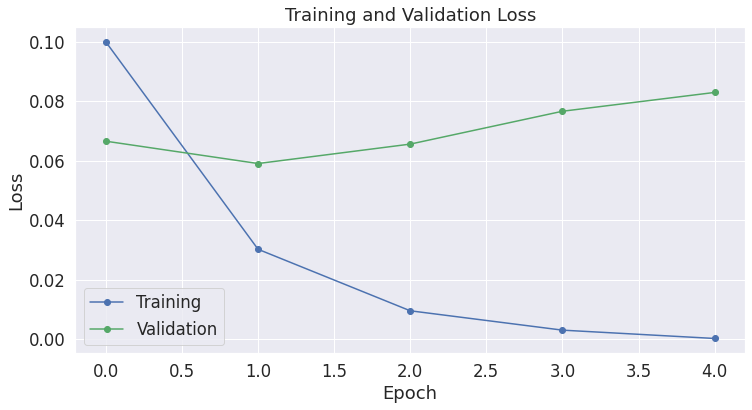

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
 
# Create a DataFrame from our training stats
df = pd.DataFrame(data = training_stats)
 
 
sns.set(style = 'darkgrid')
sns.set(font_scale = 1.5)
plt.rcParams["figure.figsize"] = (12, 6)
 
# Plot the training and validation losses
plt.plot(df['Training Loss'], 'b-o', label = "Training")
plt.plot(df['Validation Loss'], 'g-o', label = "Validation")
 
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
 
plt.show()

In [ ]:
model.eval()
 
predictions, ground_truth = [], []
 
total_test_accuracy = 0
 
for batch in test_dataloader:
  # Add batch to GPU
  batch = tuple(i.to(device) for i in batch)
  
  # Get the inputs from the dataloader
  batch_input_ids, batch_input_mask, batch_labels = batch
  
  with torch.no_grad():
      outputs = model(batch_input_ids, attention_mask = batch_input_mask)
 
  logits = outputs.logits
 
  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  labels = batch_labels.to('cpu').numpy()
 
  total_test_accuracy += get_accuracy(logits, labels)
  
  predictions.extend(np.argmax(logits, axis=1).flatten())
  ground_truth.extend(labels.flatten())
 
# Report the final accuracy for the test set
avg_test_accuracy = total_test_accuracy / len(test_dataloader)
print("Accuracy: {0:.4f}".format(avg_test_accuracy))

Accuracy: 0.9923
